In [76]:
## AI Project: Predicting the Price of Used Cars
### Step 1: Data Preprocessing & Exploratory Data Analysis (EDA)
# 
# This notebook is dedicated to data preparation and exploratory data analysis with the aim of predicting the price of used vehicles.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [78]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [79]:
## Loading the dataset
df = pd.read_csv("autoscout.csv")

In [80]:
## Brief overview of the first 5 data
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [81]:
## DATA PRE-PROCESSING

In [82]:
### Cleaning column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [83]:
### Converting numeric columns
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["km"] = pd.to_numeric(df["km"], errors="coerce")
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["hp_kw"] = pd.to_numeric(df["hp_kw"], errors="coerce")
df["displacement_cc"] = pd.to_numeric(df["displacement_cc"], errors="coerce")
df["weight_kg"] = pd.to_numeric(df["weight_kg"], errors="coerce")
df["cons_comb"] = pd.to_numeric(df["cons_comb"], errors="coerce")

In [84]:
### Cleaning missing values
missing = df.isnull().sum()
missing[missing > 0]

#The Rule of Thumb says if we are droping or removing 5% or less than that data from the original data. we are safely remove that.
# Delete lines with missing prices or mileage (we don't have any, but we're doing it just in case)
df = df.dropna(subset=["price", "km", "age"])

# We replace missing numeric values with their median (we don't have any NA values, but we do it just in case).
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   type                 15915 non-null  object 
 6   fuel                 15915 non-null  object 
 7   gears                15915 non-null  float64
 8   comfort_convenience  15915 non-null  object 
 9   entertainment_media  15915 non-null  object 
 10  extras               15915 non-null  object 
 11  safety_security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  previous_owners      15915 non-null  float64
 14  hp_kw                15915 non-null  float64
 15  inspection_new       15915 non-null 

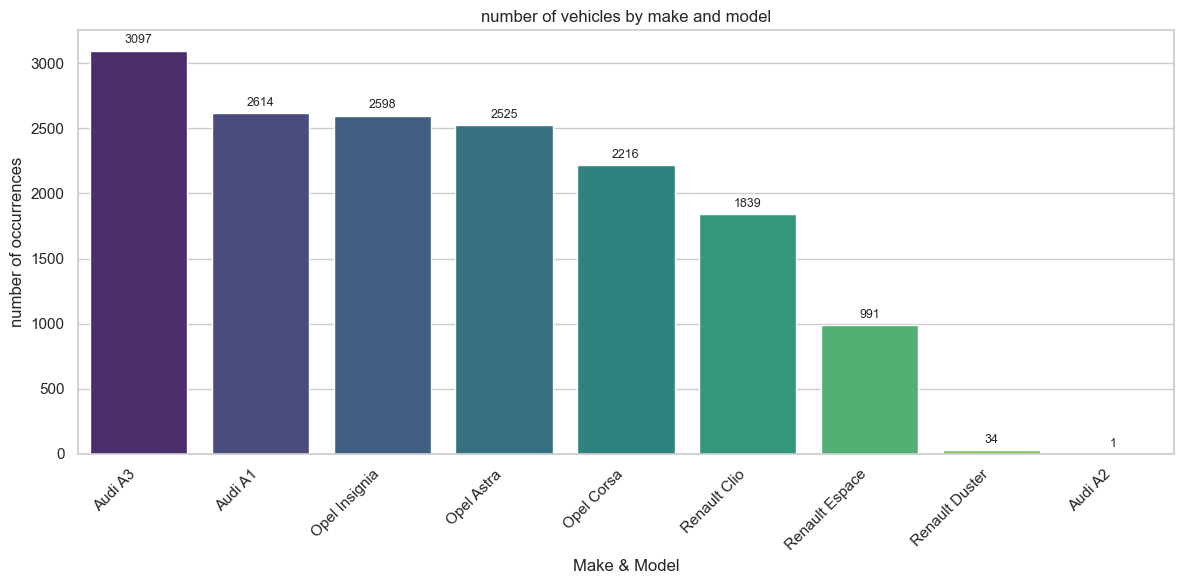

In [86]:
# number of vehicles by make and model
model_counts = df['make_model'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_counts.index, y=model_counts.values, hue=model_counts.index, dodge=False, palette='viridis', legend=False)

for i, count in enumerate(model_counts.values):
    ax.text(i, count + model_counts.max()*0.01, str(count), ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title("number of vehicles by make and model")
plt.xlabel("Make & Model")
plt.ylabel("number of occurrences")
plt.tight_layout()
plt.show()

In [87]:
# Only keep models with at least 100 occurrences (rule of thumb)
df = df[df['make_model'].isin(model_counts[model_counts >= 100].index)]

# You can see that all our lines are complete
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 15880 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15880 non-null  object 
 1   body_type            15880 non-null  object 
 2   price                15880 non-null  int64  
 3   vat                  15880 non-null  object 
 4   km                   15880 non-null  float64
 5   type                 15880 non-null  object 
 6   fuel                 15880 non-null  object 
 7   gears                15880 non-null  float64
 8   comfort_convenience  15880 non-null  object 
 9   entertainment_media  15880 non-null  object 
 10  extras               15880 non-null  object 
 11  safety_security      15880 non-null  object 
 12  age                  15880 non-null  float64
 13  previous_owners      15880 non-null  float64
 14  hp_kw                15880 non-null  float64
 15  inspection_new       15880 non-null  int6

,price,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb
count,15880.000000,15880.000000,15880.000000,15880.000000,15880.000000,15880.000000,15880.000000,15880.000000,15880.000000,15880.000000
mean,18034.004471,32157.106244,5.937217,1.392695,1.045088,88.523929,0.247607,1428.087028,1338.087343,4.832188
std,7385.661463,36989.726521,0.705542,1.120690,0.336098,26.698484,0.431636,275.723092,199.731957,0.868484
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12860.000000,2000.000000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20500.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1300.000000,4.800000
75%,21905.000000,47000.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [88]:
# body type by model
body_type_by_model = pd.crosstab(df['make_model'], df['body_type'])
display(body_type_by_model.head(10))

body_type,Compact,Convertible,Coupe,Off-Road,Sedans,Station wagon,Transporter,Van
make_model,,,,,,,,
Audi A1,1039,0,2,0,1551,21,0,1
Audi A3,182,8,4,0,2621,282,0,0
Opel Astra,185,0,2,1,1053,1284,0,0
Opel Corsa,1317,0,13,3,874,0,7,2
Opel Insignia,27,0,1,7,900,1662,0,1
Renault Clio,484,0,1,2,984,337,29,2
Renault Espace,6,0,2,8,21,91,52,811


In [89]:
# Remove make_model–body_type combinations that are too rare to avoid as much noise as possible (< 50 cases).
rare_pairs = df.groupby(['make_model', 'body_type']).size()
pairs_to_keep = rare_pairs[rare_pairs >= 10].index
df = df[df.set_index(['make_model', 'body_type']).index.isin(pairs_to_keep)]

body_type_by_model = pd.crosstab(df['make_model'], df['body_type'])
display(body_type_by_model.head(10))

body_type,Compact,Coupe,Sedans,Station wagon,Transporter,Van
make_model,,,,,,
Audi A1,1039,0,1551,21,0,0
Audi A3,182,0,2621,282,0,0
Opel Astra,185,0,1053,1284,0,0
Opel Corsa,1317,13,874,0,0,0
Opel Insignia,27,0,900,1662,0,0
Renault Clio,484,0,984,337,29,0
Renault Espace,0,0,21,91,52,811


In [90]:
df.to_csv("autoscout_clean.csv", index=False)
print("File 'autoscout_clean.csv' saved with", len(df), "lines.")

File 'autoscout_clean.csv' saved with 15820 lines.


In [91]:
## EXPLORATORY DATA ANALYSIS (EDA)

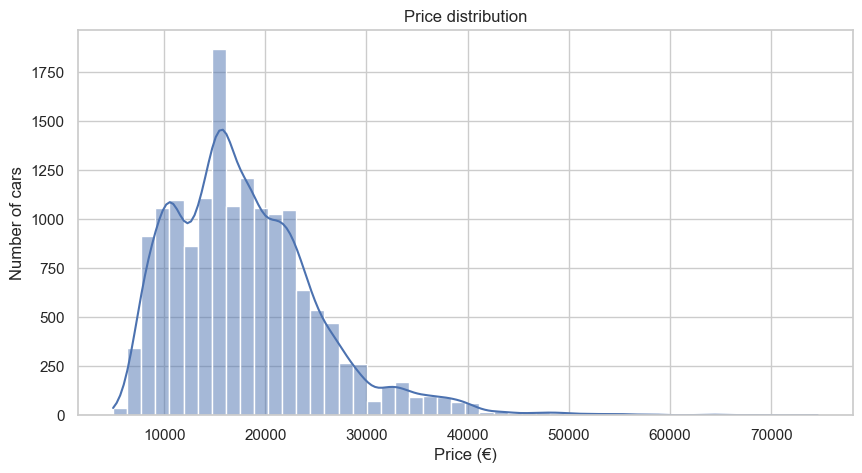

In [92]:
### price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price distribution")
plt.xlabel("Price (€)")
plt.ylabel("Number of cars")
plt.show()

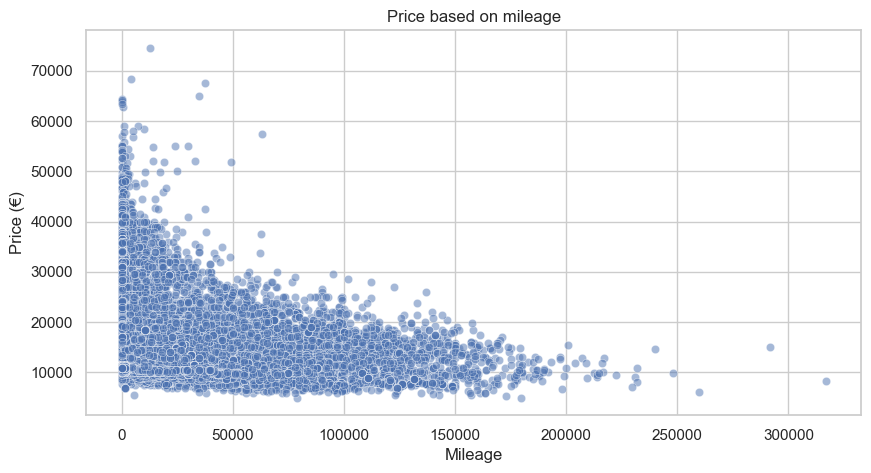

In [93]:
### Mileage vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x="km", y="price", data=df, alpha=0.5)
plt.title("Price based on mileage")
plt.xlabel("Mileage")
plt.ylabel("Price (€)")
plt.show()

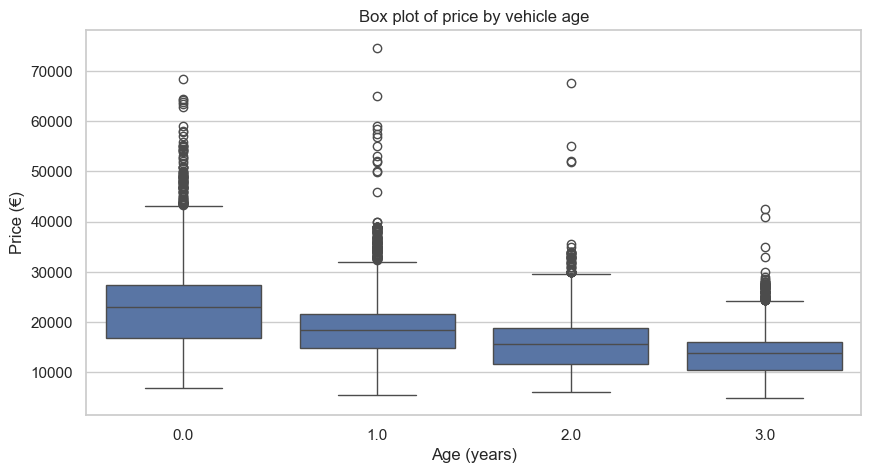

In [94]:
### Age vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x="age", y="price", data=df)
plt.title("Box plot of price by vehicle age")
plt.xlabel("Age (years)")
plt.ylabel("Price (€)")
plt.show()

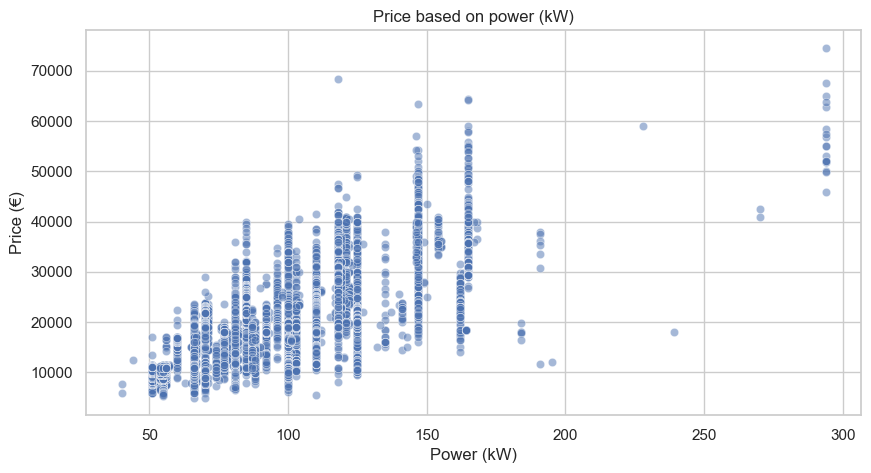

In [95]:
### Power vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x="hp_kw", y="price", data=df, alpha=0.5)
plt.title("Price based on power (kW)")
plt.xlabel("Power (kW)")
plt.ylabel("Price (€)")
plt.show()

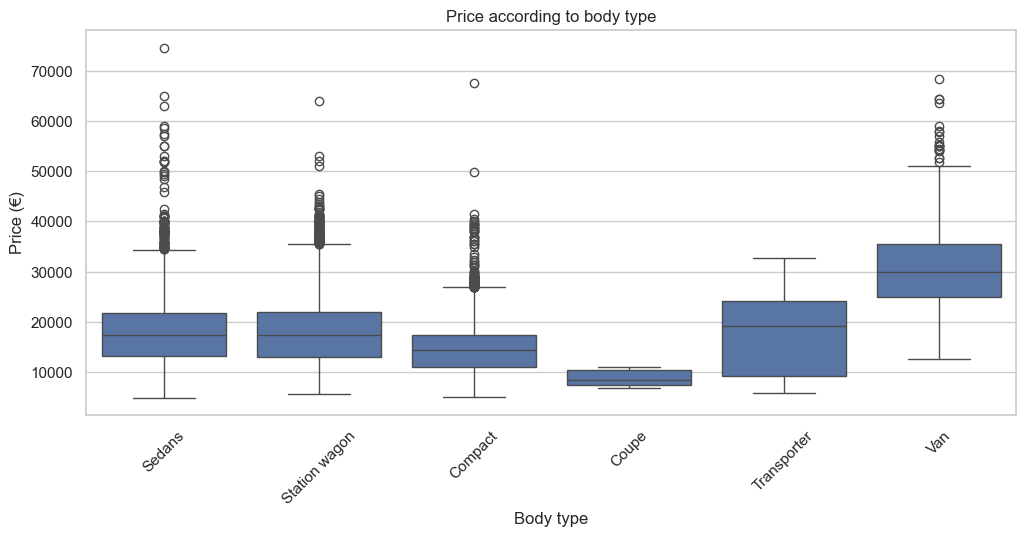

In [96]:
### Body_type vs Price
plt.figure(figsize=(12, 5))
sns.boxplot(x="body_type", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price according to body type")
plt.xlabel("Body type")
plt.ylabel("Price (€)")
plt.show()

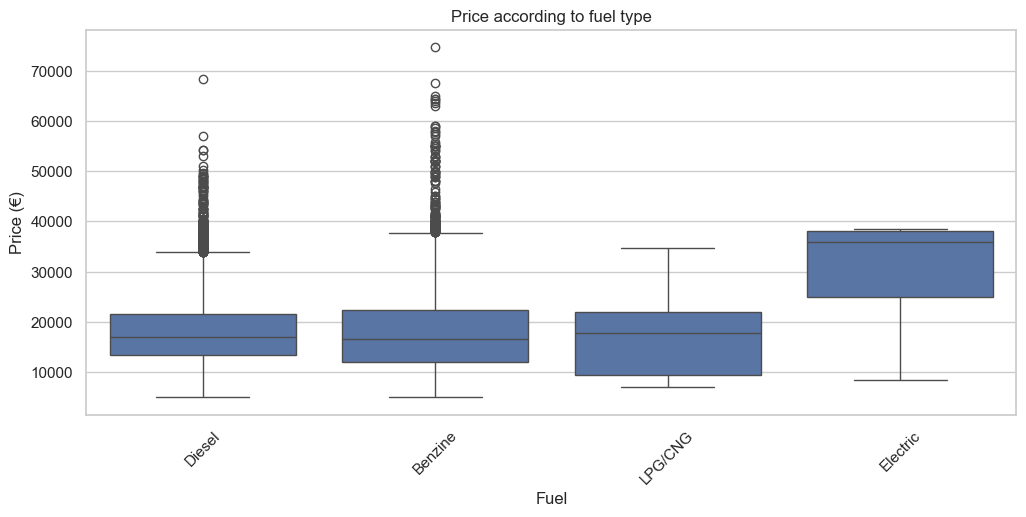

In [97]:
### Fuel type vs. price
plt.figure(figsize=(12, 5))
sns.boxplot(x="fuel", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price according to fuel type")
plt.xlabel("Fuel")
plt.ylabel("Price (€)")
plt.show()

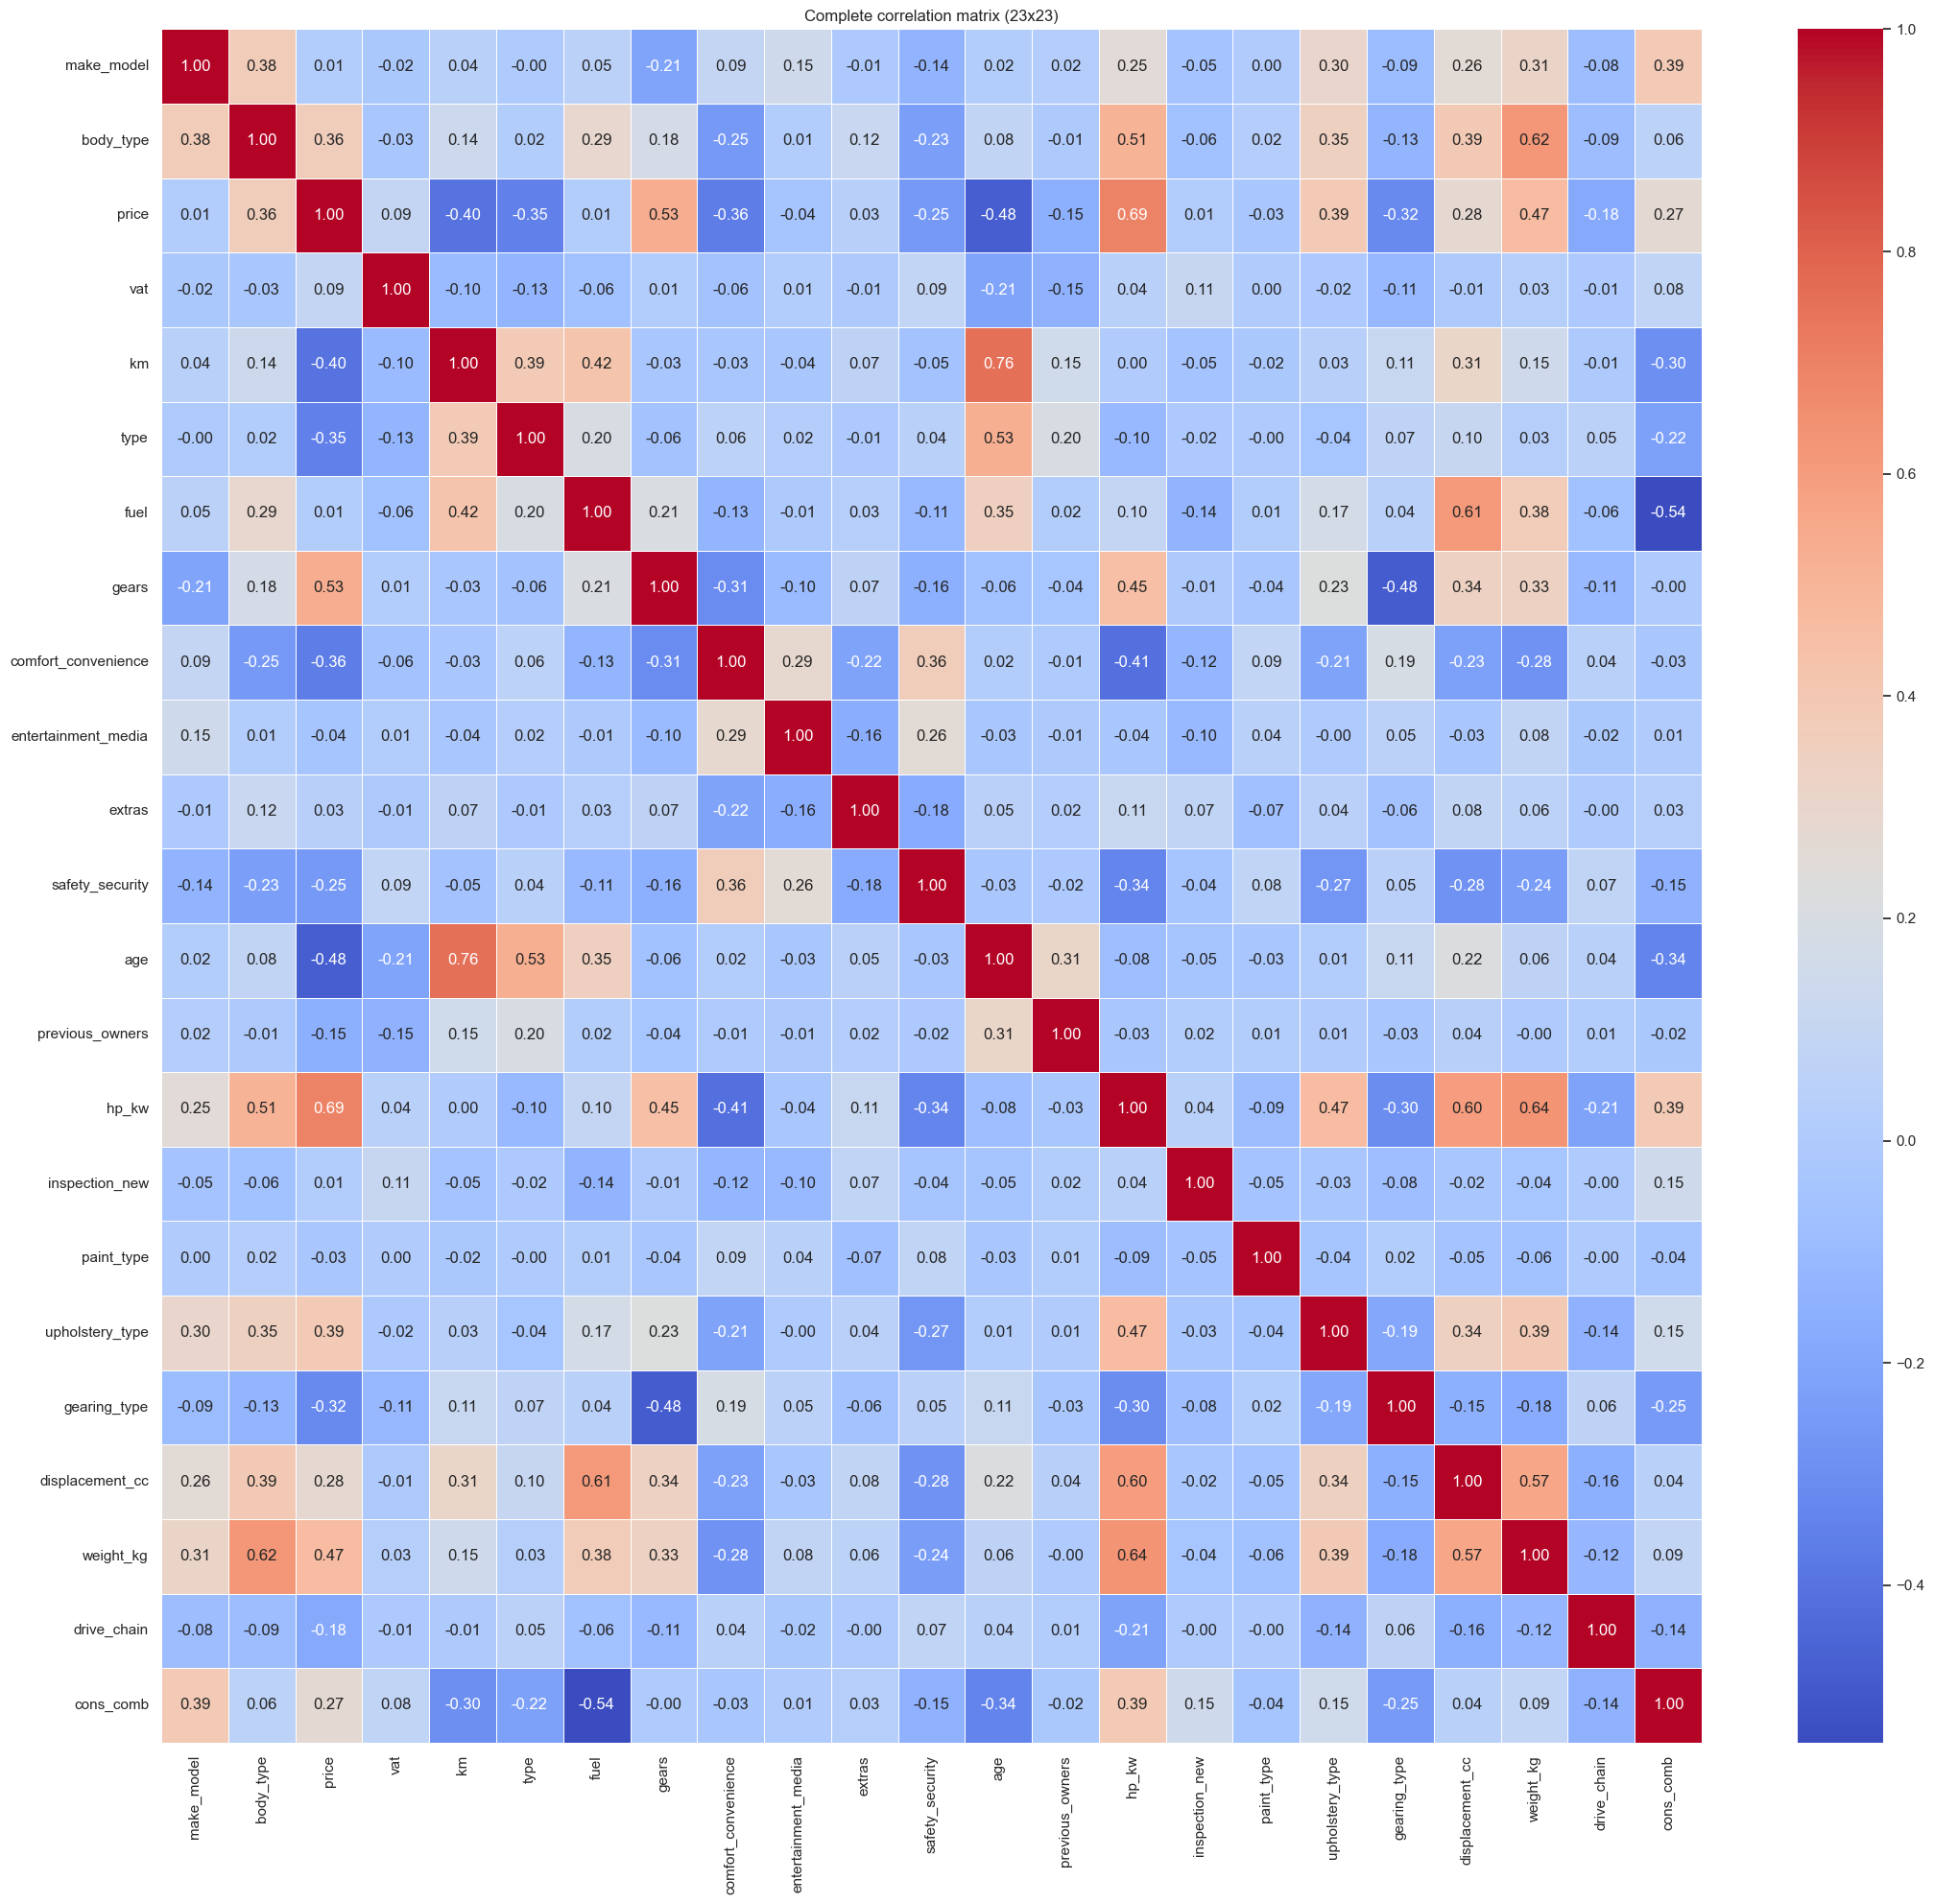

In [98]:
### correlation matrix of all our columns in order to measure the impact of each of our features
cols = [
    'make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel', 'gears',
    'comfort_convenience', 'entertainment_media', 'extras', 'safety_security',
    'age', 'previous_owners', 'hp_kw', 'inspection_new', 'paint_type',
    'upholstery_type', 'gearing_type', 'displacement_cc', 'weight_kg',
    'drive_chain', 'cons_comb'
]

df_corr = df[cols].copy()


le = LabelEncoder()
for col in df_corr.columns:
    if df_corr[col].dtype == "object" or df_corr[col].dtype == "bool":
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

corr_matrix = df_corr.corr(method="pearson")

plt.figure(figsize=(22, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Complete correlation matrix (23x23)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [99]:
# As the distribution of prices was quite asymmetrical, we decided to make it more symmetrical for our model.
# Add a logarithmic column to see if there is more impact in relation to the logarithmic price.
df['log_price'] = np.log(df['price'])
df['log_km'] = np.log(df['km'] + 1)
df.head()

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,log_price,log_km
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,9.665865,10.933357
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,9.581904,11.289794
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,9.591513,11.332015
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,9.581904,11.198228
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,9.728539,9.692828


In [100]:
# the relevant columns we have selected
cols_to_encode = [
    'make_model', 'body_type', 'price', 'log_price', 'km', 'fuel', 'gears',
    'age', 'previous_owners', 'hp_kw', 'inspection_new', 'upholstery_type', 'gearing_type', 'displacement_cc', 'weight_kg', 'cons_comb'
]

df_corr_log = df[cols_to_encode].copy()

le = LabelEncoder()
for col in df_corr_log.columns:
    if df_corr_log[col].dtype == 'object' or df_corr_log[col].dtype == 'bool':
        df_corr_log[col] = le.fit_transform(df_corr_log[col].astype(str))

#  Matrix with `price`
corr_price = df_corr_log.drop(columns=["log_price"]).corr()

# Matrix with `log_price`
corr_log_price = df_corr_log.drop(columns=["price"]).corr()

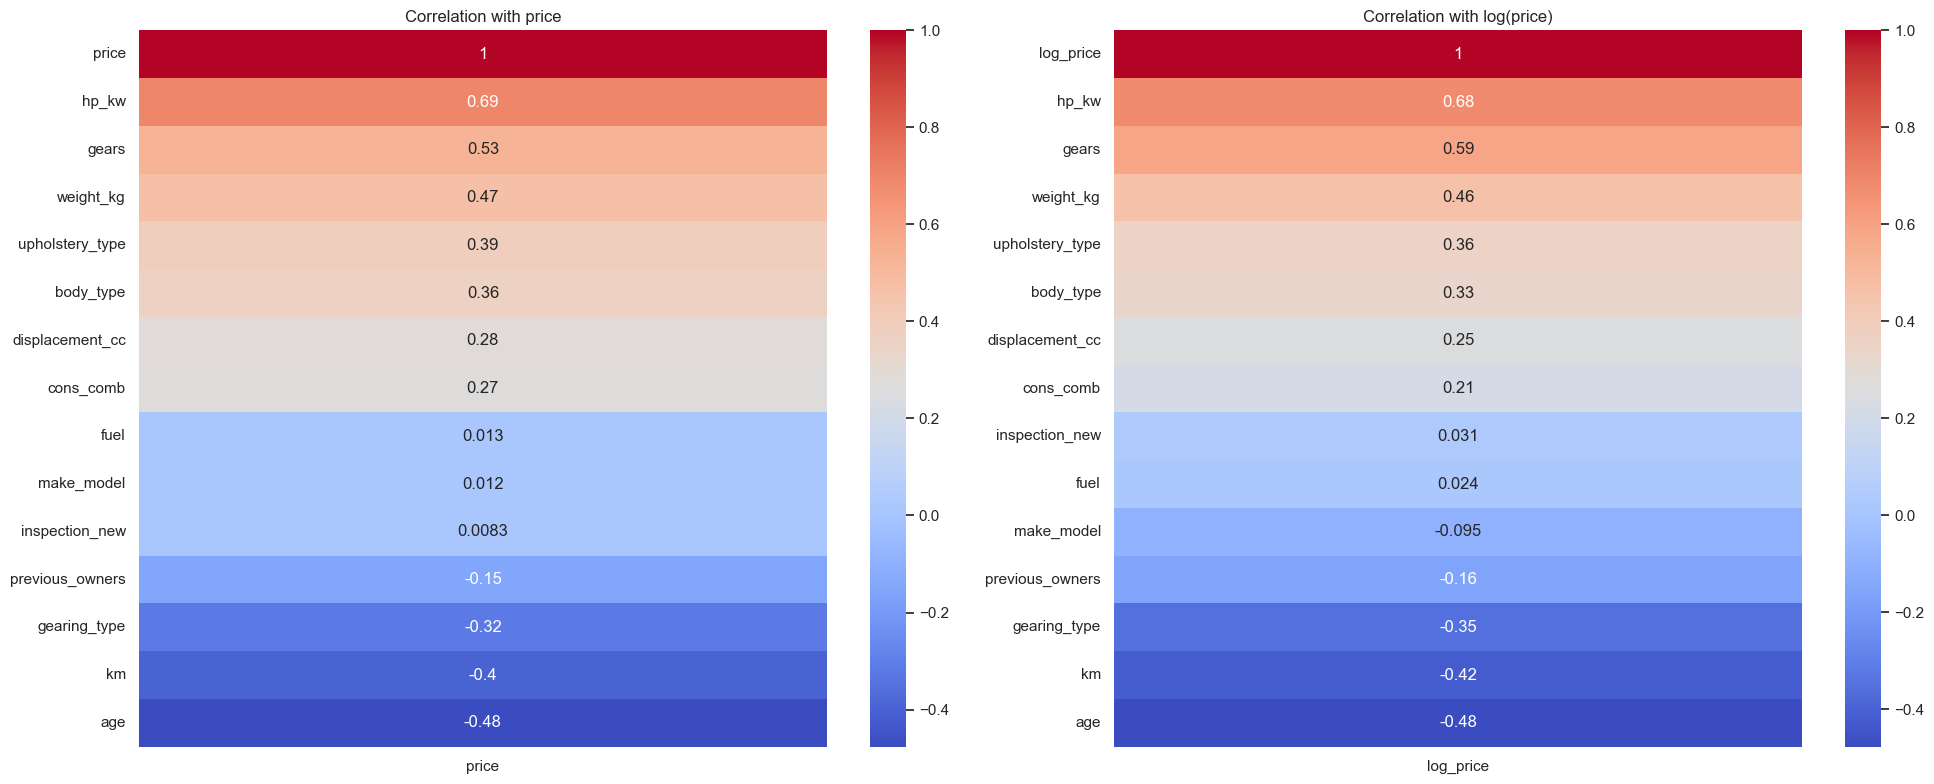

In [101]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(corr_price[['price']].sort_values('price', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with price")

plt.subplot(1, 2, 2)
sns.heatmap(corr_log_price[['log_price']].sort_values('log_price', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with log(price)")

plt.tight_layout()
plt.show()

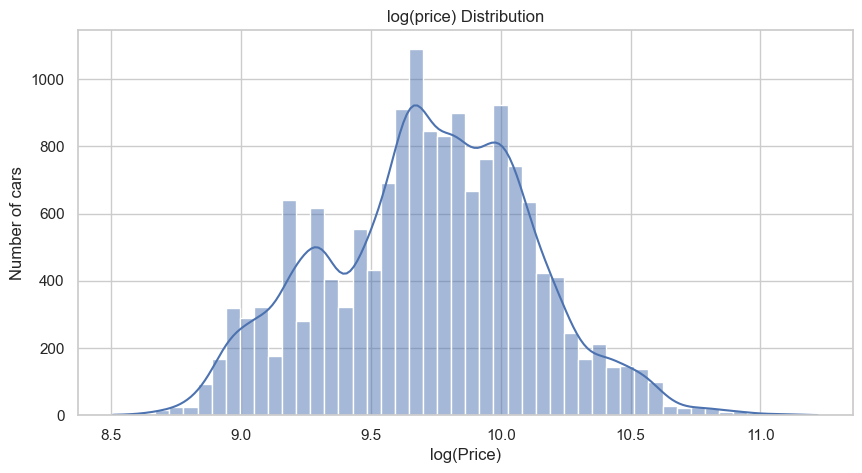

In [102]:
### New price distribution after applying log to prices
plt.figure(figsize=(10, 5))
sns.histplot(df["log_price"], bins=50, kde=True)
plt.title("log(price) Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Number of cars")
plt.show()

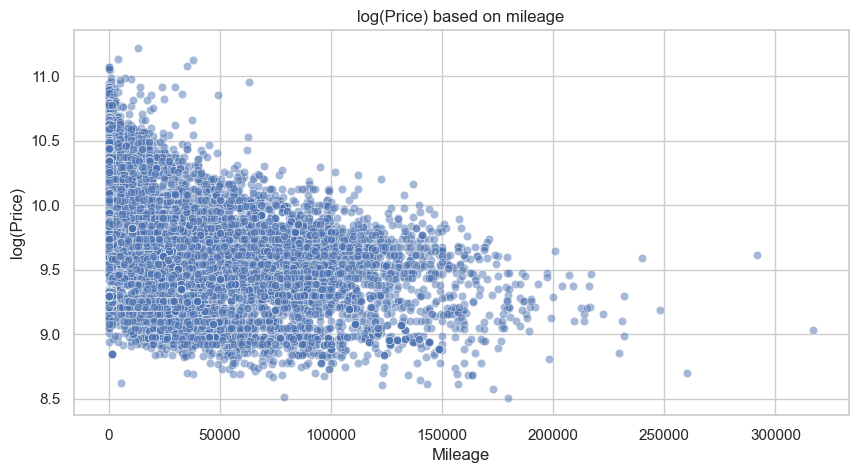

In [103]:
### Mileage vs. Price (more practical for linear relationships)
plt.figure(figsize=(10, 5))
sns.scatterplot(x="km", y="log_price", data=df, alpha=0.5)
plt.title("log(Price) based on mileage")
plt.xlabel("Mileage")
plt.ylabel("log(Price)")
plt.show()

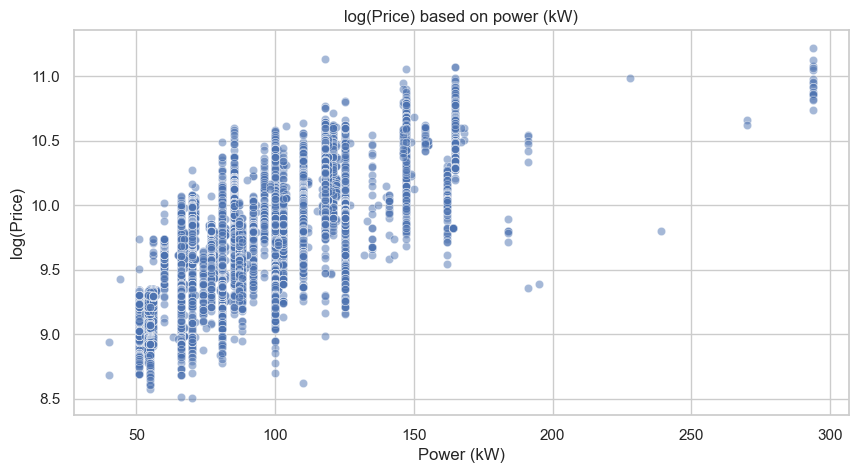

In [104]:
### Power vs Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x="hp_kw", y="log_price", data=df, alpha=0.5)
plt.title("log(Price) based on power (kW)")
plt.xlabel("Power (kW)")
plt.ylabel("log(Price)")
plt.show()

In [105]:
df.head()

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb,log_price,log_km
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,9.665865,10.933357
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,9.581904,11.289794
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,9.591513,11.332015
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,9.581904,11.198228
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,9.728539,9.692828


In [106]:
### Extraction of columns that we consider useful for models and encoding
selected_columns = [
    'age', 'km', 'hp_kw', 'gears', 'weight_kg', 'displacement_cc',
    'body_type', 'upholstery_type', 'gearing_type', 'fuel', 'make_model',
    'previous_owners', 'inspection_new', 'log_price'
]

df_model = df[selected_columns].copy()

df_model[['make', 'model']] = df_model['make_model'].str.extract(r'(\w+)\s(.+)', expand=True)
df_model.drop(columns='make_model', inplace=True)

categorical_cols = ['body_type', 'upholstery_type', 'gearing_type', 'fuel', 'make', 'model']
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=False)


X = df_encoded.drop(columns=['log_price'])
y = df_encoded['log_price']


print(f"Dimensions de X : {X.shape}")
print(f"Dimensions de Y : {y.shape}")
X.head()

Dimensions de X : (15820, 33)
Dimensions de Y : (15820,)


,age,km,hp_kw,gears,weight_kg,displacement_cc,previous_owners,inspection_new,body_type_Compact,body_type_Coupe,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,upholstery_type_Cloth,upholstery_type_Part/Full Leather,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,3.0,56013.0,66.0,7.0,1220.0,1422.0,2.0,1,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False
1,2.0,80000.0,141.0,7.0,1255.0,1798.0,1.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False
2,3.0,83450.0,85.0,7.0,1135.0,1598.0,1.0,0,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False
3,3.0,73000.0,66.0,6.0,1195.0,1422.0,1.0,0,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False
4,3.0,16200.0,66.0,7.0,1135.0,1422.0,1.0,1,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False


In [107]:
X.to_csv("X_encoded.csv", index=False)
y.to_csv("y_log_price.csv", index=False)